<a href="https://colab.research.google.com/github/pronsSec/birdflu_eda/blob/main/birdflu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [220]:
!pip install -U pandasql

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [221]:
import pandas as pd
import pandasql as ps
import numpy as np
import seaborn as sns
from pandasql import *


---

In [222]:
df = pd.read_csv('/content/hpai-wild-birds.csv')

In [223]:
df.head()

,State,County,Date_Detected,HPAI_Strain,Type_of_Wild_Bird,Sampling_Source
0,South Carolina,Colleton,1/13/2022,EA H5N1,American wigeon,Hunter harvest NWDP
1,South Carolina,Colleton,1/13/2022,EA H5N1,Blue-winged teal,Hunter harvest NWDP
2,North Carolina,Hyde,1/16/2022,EA H5N1,Northern shoveler,Hunter harvest NWDP
3,North Carolina,Hyde,1/20/2022,EA H5N1,American wigeon,Hunter harvest NWDP
4,North Carolina,Hyde,1/20/2022,EA H5,Gadwall,Hunter harvest NWDP


In [224]:
df.shape

(4362, 6)

---

In [225]:
df.describe()

,State,County,Date_Detected,HPAI_Strain,Type_of_Wild_Bird,Sampling_Source
count,4362,4362,4362,4361,4362,4362
unique,48,588,172,7,119,106
top,Florida,Brevard,10/25/2022,EA H5N1,Mallard,Hunter harvest NWDP
freq,321,157,345,2975,679,812


# 119 Unique Types of Birds. Mallard leading.

---

In [226]:
df.dtypes

State                object
County               object
Date_Detected        object
HPAI_Strain          object
Type_of_Wild_Bird    object
Sampling_Source      object
dtype: object

---

# Slices and Dices



#### Num of detections by bird per state.



In [227]:
query = '''
select State, Type_of_Wild_Bird, count(*) as Num_of_Detections from df group by 1, 2 
'''

result = sqldf(query)

In [228]:
result

,State,Type_of_Wild_Bird,Num_of_Detections
0,Alabama,American wigeon,1
1,Alabama,Black vulture,18
2,Alaska,American green-winged teal,6
3,Alaska,American wigeon,6
4,Alaska,Arctic tern,1
...,...,...,...
640,Wyoming,Trumpeter swan,1
641,Wyoming,Turkey vulture,8
642,Wyoming,Vulture (unidentified),1
643,Wyoming,Wild turkey,13


In [229]:
q = '''
select sum(Num_of_Detections) from result
'''

In [230]:
sqldf(q)

,sum(Num_of_Detections)
0,4362


#### Distinct strains per State

In [231]:
q = '''
select State, count(distinct HPAI_Strain) as Num_of_Detected_Strains from df group by 1
'''

result2 = sqldf(q)
result2

,State,Num_of_Detected_Strains
0,Alabama,1
1,Alaska,4
2,Arizona,2
3,Arkansas,1
4,California,4
5,Colorado,3
6,Connecticut,2
7,Delaware,2
8,District of Columbia,2
9,Florida,5


In [232]:
q = '''
select count(*) as Num_of_States_With_1_Strain from result2 where Num_of_Detected_Strains = 1
'''

sqldf(q)

,Num_of_States_With_1_Strain
0,4


In [233]:
q = '''
select count(*) as Num_of_States_With_2_Strains from result2 where Num_of_Detected_Strains = 2
'''

sqldf(q)

,Num_of_States_With_2_Strains
0,16


In [234]:
q = '''
select count(*) as Num_of_States_With_3_Strains from result2 where Num_of_Detected_Strains = 3
'''

sqldf(q)

,Num_of_States_With_3_Strains
0,24


In [235]:
q = '''
select count(*) as Num_of_States_With_4_Strains from result2 where Num_of_Detected_Strains = 4
'''

sqldf(q)

,Num_of_States_With_4_Strains
0,3


In [236]:
q = '''
select count(*) as Num_of_States_With_5_Strains from result2 where Num_of_Detected_Strains = 5
'''

sqldf(q)

,Num_of_States_With_5_Strains
0,1


#### Detections/Time

In [237]:
q = '''
select Date_Detected, Type_of_Wild_Bird, count(*) as Num_of_Detections from df group by 1, 2
'''

result3 = sqldf(q)
result3

,Date_Detected,Type_of_Wild_Bird,Num_of_Detections
0,1/13/2022,American wigeon,1
1,1/13/2022,Blue-winged teal,1
2,1/16/2022,Gadwall,2
3,1/16/2022,Northern shoveler,2
4,1/20/2022,American wigeon,25
...,...,...,...
1191,9/8/2022,Turkey vulture,1
1192,9/8/2022,Wood duck,1
1193,9/9/2022,Bald eagle,1
1194,9/9/2022,Black vulture,15


Worth noting: 172 unique days where there were detections in 2022

In [238]:
result3.astype({'Date_Detected': 'datetime64[ns]'}).dtypes

Date_Detected        datetime64[ns]
Type_of_Wild_Bird            object
Num_of_Detections             int64
dtype: object

In [239]:
q = '''
select *, 
case
  when Date_Detected like '1/%' then 1
  when Date_Detected like '2/%' then 2
  when Date_Detected like '3/%' then 3
  when Date_Detected like '4/%' then 4
  when Date_Detected like '5/%' then 5
  when Date_Detected like '6/%' then 6
  when Date_Detected like '7/%' then 7
  when Date_Detected like '8/%' then 8
  when Date_Detected like '9/%' then 9
  when Date_Detected like '10/%' then 10
  when Date_Detected like '11/%' then 11
  when Date_Detected like '12/%' then 12
end as Month
from result3

'''

result3 = sqldf(q)
result3 = result3.sort_values(by=['Date_Detected'], ascending=True)
result3

,Date_Detected,Type_of_Wild_Bird,Num_of_Detections,Month
0,1/13/2022,American wigeon,1,1
1,1/13/2022,Blue-winged teal,1,1
2,1/16/2022,Gadwall,2,1
3,1/16/2022,Northern shoveler,2,1
7,1/20/2022,Northern pintail,3,1
...,...,...,...,...
1182,9/8/2022,American green-winged teal,1,9
1187,9/8/2022,Great horned owl,1,9
1194,9/9/2022,Black vulture,15,9
1193,9/9/2022,Bald eagle,1,9


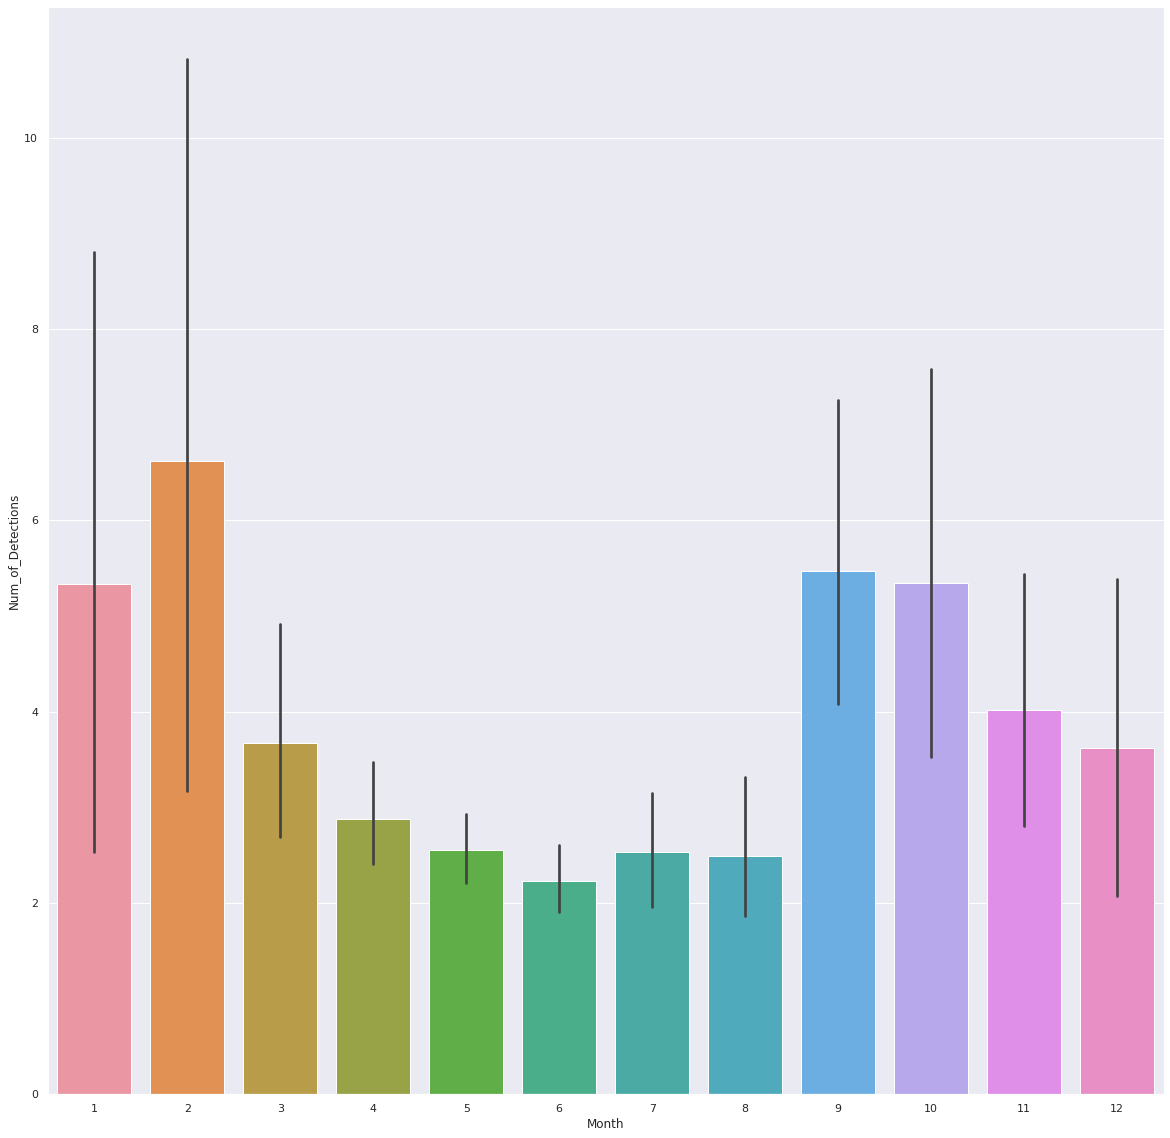

In [240]:

sns.set(rc={'figure.figsize':(20,20)})

g = sns.barplot(
    data=result3,
    x="Month", y="Num_of_Detections"
)
#g.legend_.remove()